<a href="https://colab.research.google.com/github/rushanmukherjee/GeospatialDataAnalytics/blob/main/Manhattan_TreeCount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook contains last challenge in course where I count the number of trees within various buffer distances around a neighborhood in Manhattan using GeoPandas and a tree census dataset.**

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
!pip install geodatasets

In [26]:
gdf = gpd.read_file('2010 Neighborhood Tabulation Areas (NTAs).geojson')

In [27]:
gdf

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
0,QN08,77412747.756,081,St. Albans,45401.3169155,Queens,4,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ..."
1,BK50,82089678.5561,047,Canarsie,43703.6099368,Brooklyn,3,"MULTIPOLYGON (((-73.88834 40.64671, -73.88835 ..."
2,BX41,14716710.849,005,Mount Hope,18937.2480746,Bronx,2,"MULTIPOLYGON (((-73.89561 40.85457, -73.89662 ..."
3,BK68,16482821.6487,047,Fort Greene,19825.5208594,Brooklyn,3,"MULTIPOLYGON (((-73.96939 40.69608, -73.96938 ..."
4,QN38,38835920.1944,081,Pomonok-Flushing Heights-Hillcrest,30731.4196253,Queens,4,"MULTIPOLYGON (((-73.7964 40.73828, -73.79639 4..."
...,...,...,...,...,...,...,...,...
190,BX98,18163734.8558,005,Rikers Island,18897.4872978,Bronx,2,"MULTIPOLYGON (((-73.87287 40.78598, -73.87288 ..."
191,MN99,91481030.7831,061,park-cemetery-etc-Manhattan,154275.707235,Manhattan,1,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
192,QN99,308321998.662,081,park-cemetery-etc-Queens,473312.138922,Queens,4,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
193,BX09,51982087.6968,005,Soundview-Castle Hill-Clason Point-Harding Park,67334.9993529,Bronx,2,"MULTIPOLYGON (((-73.88064 40.81852, -73.88098 ..."


### Select Specific Manhattan Neighborhood

In [29]:
gdf_mh = gdf[gdf['boro_name'] == 'Manhattan'].head(1)
gdf_mh

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
45,MN19,17390168.1386,061,Turtle Bay-East Midtown,21251.8414488,Manhattan,1,"MULTIPOLYGON (((-73.96052 40.74411, -73.96057 ..."


In [10]:
####Load Tree Census data

tree_df = pd.read_csv('2015_Street_Tree_Census_-_Tree_Data.csv')

In [20]:
## Create a geodataframe from the csv file with added geometry
geometry = [Point(xy) for xy in zip(tree_df['longitude'], tree_df['latitude'])]
tree_gdf = gpd.GeoDataFrame(tree_df, geometry=geometry)

In [21]:
## Define global coordinate system
tree_gdf.crs = 4326

In [24]:
tree_gdf.head(3)

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl,geometry
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09,POINT (-73.84422 40.72309)
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09,POINT (-73.81868 40.79411)
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09,POINT (-73.93661 40.71758)


In [30]:
### Transform to local coordinate system
gdf_mh_local = gdf_mh.to_crs(2263)
tree_gdf_local = tree_gdf.to_crs(2263)

In [31]:
# Define a list of distance values for buffering
distances = [10, 1000, 10000, 25000, 50000, 75000]

distance is 10 feet
tree count is 2257

distance is 1000 feet
tree count is 3817

distance is 10000 feet
tree count is 43297

distance is 25000 feet
tree count is 151284

distance is 50000 feet
tree count is 445740

distance is 75000 feet
tree count is 620765



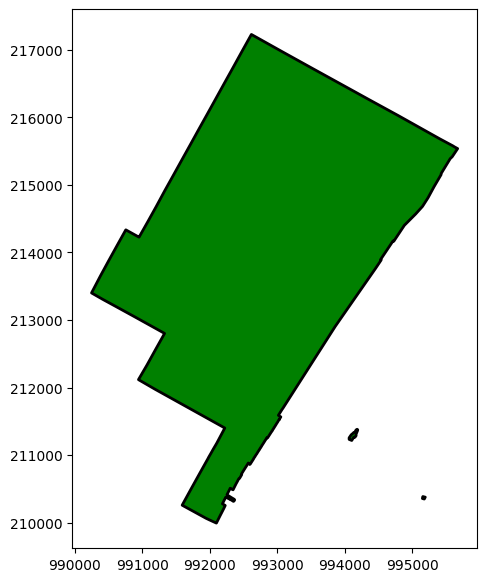

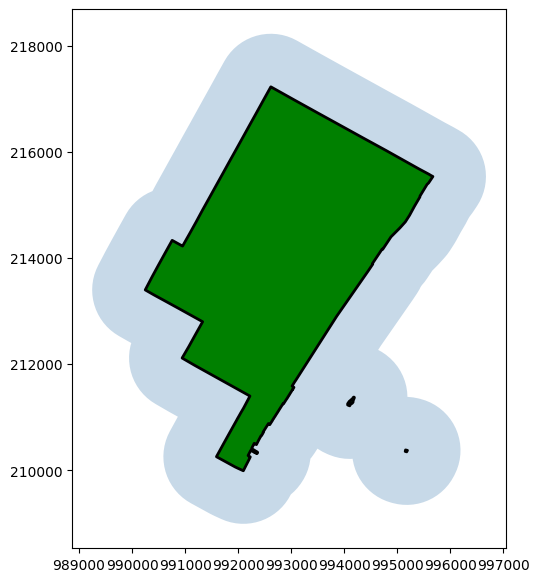

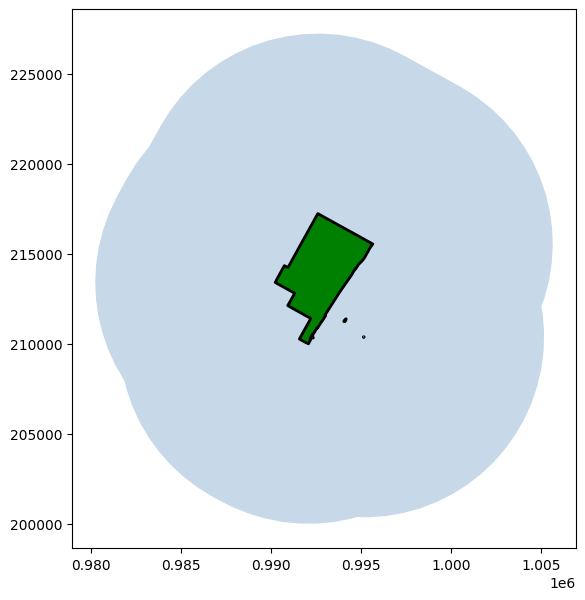

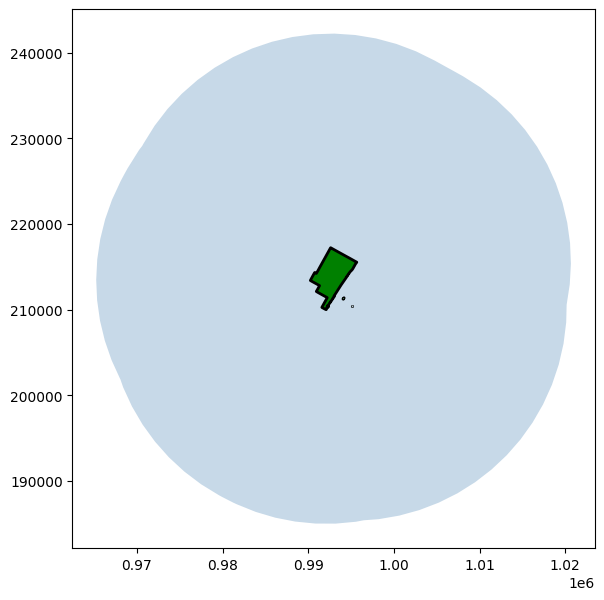

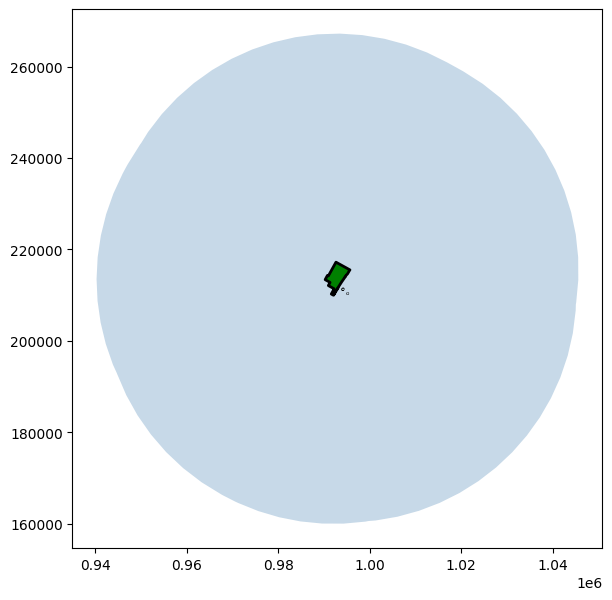

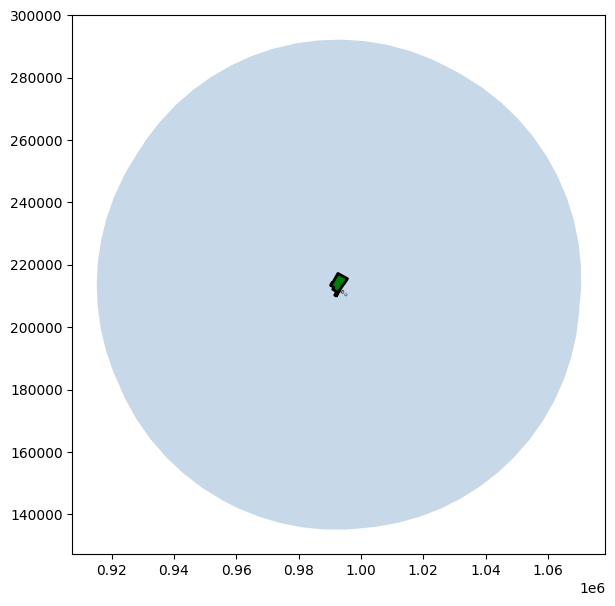

In [33]:
# Iterate over each distance, create buffers, and count trees within the buffer zone
for distance in distances:

    # Create a copy of the gdf_ngh_local DataFrame and buffer its geometry
    gdf_mh_local_buffered = gdf_mh_local.copy()
    gdf_mh_local_buffered['geometry'] = gdf_mh_local_buffered['geometry'].buffer(distance)
    gdf_joined = gpd.overlay(tree_gdf_local, gdf_mh_local_buffered, how='intersection')

    ##print(gdf_joined)

    ##calculate tree count
    tree_count = len(gdf_joined['tree_id'].unique())

    print(f'distance is {distance} feet')
    print(f'tree count is {tree_count}')
    print()

    # Create a visualization for each distance value here

    f,ax = plt.subplots(1,1, figsize = (7,7))
    gdf_mh_local_buffered.plot(ax=ax, color='steelblue', alpha=0.3)
    gdf_mh_local.plot(ax=ax, color='green', edgecolor='k', linewidth=2)